In [1]:
import pandas as pd

In [2]:
#load dataset
df = pd.read_csv("train_data.csv")
df2 = pd.read_csv("test_data.csv")

In [3]:
#display the first 5 rows of the dataset
print(df.head())

                                         review_text sentiment_label
0  Bromwell High is a cartoon comedy. It ran at t...        positive
1  Homelessness (or Houselessness as George Carli...        positive
2  Brilliant over-acting by Lesley Ann Warren. Be...        positive
3  This is easily the most underrated film inn th...        positive
4  This is not the typical Mel Brooks film. It wa...        positive


In [4]:
#displaying the column names
print(df.columns)

Index(['review_text', 'sentiment_label'], dtype='object')


In [5]:
#accessing unique labels values
train_labels = df['sentiment_label']
print(train_labels.unique())

test_labels = df2['sentiment_label']

['positive' 'negative']


In [6]:
#counting the number of occurrence of each labels
label_counts = train_labels.value_counts()
print(label_counts)

sentiment_label
positive    12500
negative    12500
Name: count, dtype: int64


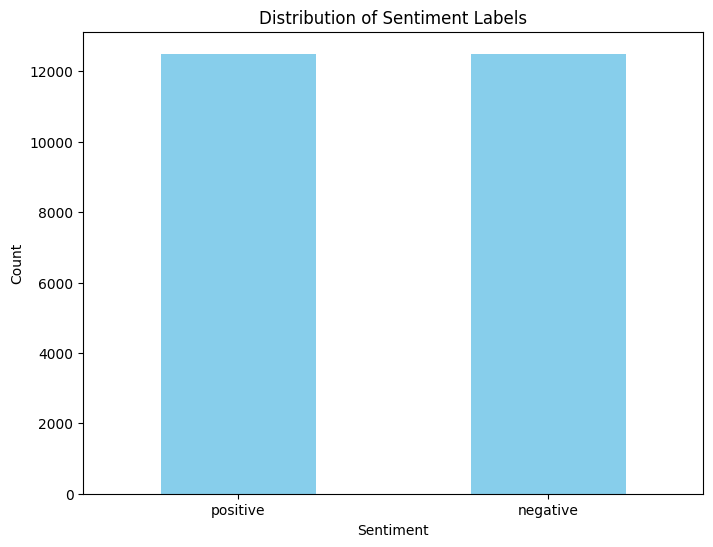

In [7]:
##Visualizing label distribution
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 6))
label_counts.plot(kind = 'bar', color = 'skyblue')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Dataset Preprocessing

In [8]:
from nltk.tokenize import word_tokenize

#Tokenize the train text data
tokenized_train_reviews = [word_tokenize(train_review) for train_review in df['review_text']]
#Tokenize the test text data
tokenized_test_reviews = [word_tokenize(test_review) for test_review in df['review_text']]

In [9]:
print(tokenized_train_reviews)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on the string labels and transform them into numerical labels
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.fit_transform(test_labels)
# Print the unique numerical labels
print(train_labels)
print(train_labels)

[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]


In [11]:
import numpy as np

In [12]:
import re

def clean_text(text):
    #Remove HTML tags
    clean_text = re.sub(r'<.*?>', '', text)
    #Remove special characters, punctuations and white space
    clean_text = re.sub(r'[^a-zA-Z\s]', '', clean_text)
    return clean_text
#concatenate tokens with each review into a single string
concatenated_train_reviews = [' '.join(train_review) for train_review in tokenized_train_reviews ]
#clean the text data
cleaned_train_reviews = [clean_text(train_review) for train_review in concatenated_train_reviews]

#implementing the same for test data
#concatenate tokens with each review into a single string
concatenated_test_reviews = [' '.join(test_review) for test_review in tokenized_test_reviews ]
#clean the text data
cleaned_test_reviews = [clean_text(test_review) for test_review in concatenated_test_reviews]

In [13]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

#Remove stopwords from tokenized reviews if any
filtered_train_reviews = [remove_stopwords(train_review) for train_review in tokenized_train_reviews]
filtered_test_reviews = [remove_stopwords(test_review) for test_review in tokenized_test_reviews]

In [14]:
print(filtered_train_reviews)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
def normalize_text(tokens):
    normalized_tokens = [token.lower() for token in tokens]
    return normalized_tokens

#Normalize the tokenized reviews
normalized_train_reviews = [normalize_text(train_review) for train_review in filtered_train_reviews]
normalized_train_reviews_str = [' '.join(train_review) for train_review in normalized_train_reviews]

#Same for test data
normalized_test_reviews = [normalize_text(test_review) for test_review in filtered_test_reviews]
normalized_test_reviews_str = [' '.join(test_review) for test_review in normalized_test_reviews]

# Dataset Preparation

###### The following steps involves Converting the process dataset to into numerical representation particarly Bag-of-words. The original dataset already contains the Bag-of-words but for the sake of knowledge and control over the dataset I decided to redo the process.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
#initialize the countVectorizer
vectorizer = CountVectorizer(max_features = 5000)

#combine the normalized text data from both training and testing sets
normalized_reviews_str = normalized_train_reviews_str + normalized_test_reviews_str

#fit the vectorizer on the combined text data
vectorizer.fit(normalized_reviews_str)

#Transform the preprocessed text data into bag of words vector for both training and testing sets
X_train_bow = vectorizer.transform(normalized_train_reviews_str)
X_test_bow = vectorizer.transform(normalized_test_reviews_str)

# Model Building

###### Using Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
#Initialize the logistic Regression Model
model = LogisticRegression()

In [21]:
#Train the model on the training data
model.fit(X_train_bow, train_labels)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
print("X_train_bow shape:", X_train_bow.shape)
print("train_labels shape:", X_test_bow.shape)

X_train_bow shape: (25000, 5000)
train_labels shape: (25000, 5000)


In [23]:
print("Length of normalized_train_reviews_str:", len(normalized_train_reviews_str))
print("Length of normalized_test_reviews_str:", len(normalized_test_reviews_str))


Length of normalized_train_reviews_str: 25000
Length of normalized_test_reviews_str: 25000


In [24]:
# Evaluate the model on the testing data
accuracy = model.score(X_test_bow, test_labels)
print("Accuracy:", accuracy)


Accuracy: 0.95964


In [25]:
print("train accuracy:", model.score(X_train_bow, train_labels))

train accuracy: 0.95964


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, confusion_matrix

In [27]:
y_pred = model.predict(X_test_bow)
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall_score)
print("F1:", f1)

Accuracy: 0.95964
Precision: 0.9591624710301286
Recall: <function recall_score at 0x000001AEEB557F60>
F1: 0.9596609762923279


In [28]:
matrix = confusion_matrix(test_labels, y_pred)
print(matrix)

[[11989   511]
 [  498 12002]]


# using naive bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB

#initialize the naive bayes mode
nb_model = MultinomialNB()

#Train the model on the training data
nb_model.fit(X_train_bow, train_labels)

MultinomialNB()

In [30]:
nb_accuracy = nb_model.score(X_test_bow, test_labels)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.8592


In [31]:
from sklearn.metrics import classification_report

#Predict labels for the testing data
nb_predictions = nb_model.predict(X_test_bow)

#calculate precision, recall and f1-score
nb_report = classification_report(test_labels, nb_predictions, target_names = ['negative', 'positive'])
print("Naive Bayes Classification Report: ")
print(nb_report)

Naive Bayes Classification Report: 
              precision    recall  f1-score   support

    negative       0.85      0.87      0.86     12500
    positive       0.86      0.85      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



# Using Support Vector Machines (SVM)

In [32]:
from sklearn.svm import SVC

In [32]:
#Initialise the SVM model
svm_model = SVC(kernel = 'linear') #using a linear kernel for efficiency

#train the model on the training data
svm_model.fit(X_train_bow, train_labels)

SVC(kernel='linear')

In [33]:
#Evaluating the model on tesing data
svm_accuracy = svm_model.score(X_test_bow, test_labels)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.97352


In [39]:
#evaluating using other metrics
y_pred = svm_model.predict(X_test_bow)
svm_f1 = f1_score(test_labels, y_pred)
svm_roc_score = roc_auc_score(test_labels, y_pred)
svm_recall = recall_score(test_labels, y_pred)
svm_roc_curve = roc_curve(test_labels, y_pred)
svm_conf_mat = confusion_matrix(test_labels, y_pred)

print(svm_f1)
print(svm_roc_score)
print(svm_recall)
print(svm_roc_curve)
print(svm_conf_mat)

0.973541167066347
0.97352
0.97432
(array([0.     , 0.02728, 1.     ]), array([0.     , 0.97432, 1.     ]), array([2, 1, 0]))
[[12159   341]
 [  321 12179]]


# Using decision trees

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
# Initialise the decision tree model
tree_model = DecisionTreeClassifier(max_depth = 100)

#Train the model on the training data
tree_model.fit(X_train_bow, train_labels)

DecisionTreeClassifier(max_depth=100)

In [43]:
#Evaluating the model on the test data
y_pred = tree_model.predict(X_test_bow)

tree_accuracy = accuracy_score(test_labels, y_pred)
tree_f1 = f1_score(test_labels, y_pred)
tree_roc_score = roc_auc_score(test_labels, y_pred)
tree_recall = recall_score(test_labels, y_pred)
tree_roc_curve = roc_curve(test_labels, y_pred)
tree_conf_mat = confusion_matrix(test_labels, y_pred)

print("Accuracy", tree_accuracy)
print("F2 :",tree_f1)
print("Roc Score: ", tree_roc_score)
print("Recall: ", tree_recall)
print("Roc Curve :", tree_roc_curve)
print("Confusion Matrix: ", tree_conf_mat)

Accuracy 0.99188
F2 : 0.9919351634817846
Roc Score:  0.9918800000000001
Recall:  0.99872
Roc Curve : (array([0.     , 0.01496, 1.     ]), array([0.     , 0.99872, 1.     ]), array([2, 1, 0]))
Confusion Matrix:  [[12313   187]
 [   16 12484]]


In [44]:
tree_accuracy = tree_model.score(X_train_bow, train_labels)
print("Accuracy", tree_accuracy)

Accuracy 0.99188


# Using Random Forests

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
#initialize random forest
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 100)

#Train the model on the training data
rf_model.fit(X_train_bow, train_labels)

RandomForestClassifier(max_depth=100)

In [46]:
#evaluatin the model on the test data
y_pred = rf_model.predict(X_test_bow)

rf_accuracy = accuracy_score(y_pred, test_labels)
rf_precision = precision_score(y_pred, test_labels)
rf_recall = recall_score(y_pred, test_labels)
rf_f1 = f1_score(y_pred, test_labels)
rf_roc_score = roc_auc_score(y_pred, test_labels)
rf_conf_mat = confusion_matrix(y_pred, test_labels)


print("Accuracy :", rf_accuracy)
print("Precision :", rf_precision)
print("recall : ", rf_recall)
print("F1 :", rf_f1)
print("Roc Score", rf_roc_score)
print("Confusion Matrix: ", rf_conf_mat)

Accuracy : 0.99936
Precision : 1.0
recall :  0.9987216363055289
F1 : 0.9993604093380236
Roc Score 0.9993608181527645
Confusion Matrix:  [[12484     0]
 [   16 12500]]


# using Gradient Boosting Machines

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
#initialize the GBM model
gbm_model = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.0003, max_depth = 50, random_state = True )

#Train the model 
gbm_model.fit(X_train_bow, train_labels)

GradientBoostingClassifier(learning_rate=0.0003, max_depth=50,
                           random_state=True)

In [38]:
#evaluate the model on the test set
y_pred = gbm_model.predict(X_test_bow)

gbm_accuracy = accuracy_score(y_pred, test_labels)
gbm_precision = precision_score(y_pred, test_labels)
gbm_f1 = f1_score(y_pred, test_labels)
gbm_conf_mat = confusion_matrix(y_pred, test_labels)


print("ACCuracy:", gbm_accuracy)
print("Precision:", gbm_precision)
print("F1:", gbm_f1)
print("Confusion Matrix:", gbm_conf_mat)

ACCuracy: 0.96512
Precision: 0.9908
F1: 0.9659932922548944
Confusion Matrix: [[11743   115]
 [  757 12385]]


# Using Neural Networks

## Using feedfarward Networks

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [24]:
#spliting the training dataset into training and valiadion
X_train, X_val, y_train, y_val = train_test_split(X_train_bow, train_labels, test_size = 0.2, random_state = 42)

In [25]:
#initialise the feedforward neural network model
fnn_model = Sequential()

#Add input layer 
fnn_model.add(Dense(128, input_dim = X_train_bow.shape[1], activation = 'relu'))



In [26]:
#hidden layers
fnn_model.add(Dense(64, activation='relu'))
fnn_model.add(Dropout(0.5))
fnn_model.add(Dense(32, activation='relu'))


In [27]:

#output layer
fnn_model.add(Dense(1, activation = 'sigmoid')) # for binary classification



In [28]:
#compile the model
fnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [29]:
# Train the model on the training data, using the validation data for monitoring
history = fnn_model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val), verbose=1)

Epoch 1/30
313/313 [==============================] - 5s 13ms/step - loss: 0.3730 - accuracy: 0.8429 - val_loss: 0.2914 - val_accuracy: 0.8756
Epoch 2/30
313/313 [==============================] - 4s 12ms/step - loss: 0.2043 - accuracy: 0.9222 - val_loss: 0.2993 - val_accuracy: 0.8798
Epoch 3/30
313/313 [==============================] - 4s 12ms/step - loss: 0.1111 - accuracy: 0.9605 - val_loss: 0.4158 - val_accuracy: 0.8726
Epoch 4/30
313/313 [==============================] - 4s 14ms/step - loss: 0.0400 - accuracy: 0.9861 - val_loss: 0.6427 - val_accuracy: 0.8670
Epoch 5/30
313/313 [==============================] - 4s 12ms/step - loss: 0.0184 - accuracy: 0.9943 - val_loss: 0.7225 - val_accuracy: 0.8714
Epoch 6/30
313/313 [==============================] - 4s 13ms/step - loss: 0.0162 - accuracy: 0.9952 - val_loss: 0.7639 - val_accuracy: 0.8622
Epoch 7/30
313/313 [==============================] - 4s 13ms/step - loss: 0.0197 - accuracy: 0.9943 - val_loss: 0.7324 - val_accuracy: 0.8696

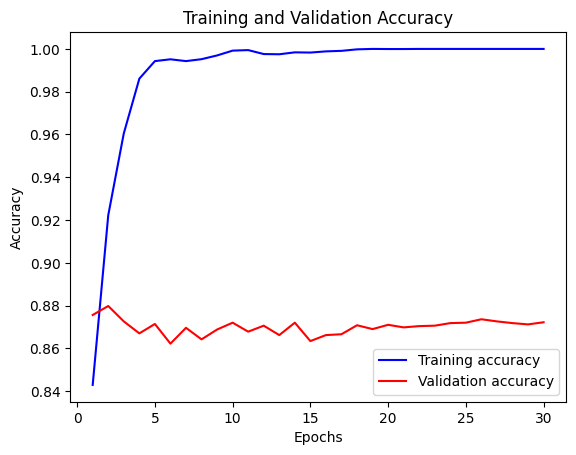

In [30]:
# Get the training history from the model
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
fnn_loss, fnn_accuracy = fnn_model.evaluate(X_test_bow, test_labels)

print('feedforward Network Accuracy:', fnn_accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.3263 - accuracy: 0.9744
feedforward Network Accuracy: 0.9744399785995483


# Using recurrent neural networks

### Long-Short Term Memory

In [80]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.models import Sequential

In [81]:
#initialise the model
rnn_model= Sequential()

In [87]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_bow, train_labels, test_size=0.2, random_state=42)


#Add an Embedding layer to convert input sequences into dense vectors
rnn_model.add(Embedding(input_dim = X_train_bow.shape[1], output_dim = 128))

#add a LSTM layer with 128 units
rnn_model.add(SimpleRNN(128))

#Add a Dense output layer with sigmoid activation for binary classification
rnn_model.add(Dense(1, activation = 'sigmoid'))

In [89]:
#compile the model

rnn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [90]:
#Train the model
rnn_model.fit(X_train_bow, train_labels, epochs =10, batch_size = 64, validation_data = (X_val, y_val))

Epoch 1/10
 37/391 [=>............................] - ETA: 4:46 - loss: 0.6948 - accuracy: 0.5017

KeyboardInterrupt: 

In [ ]:
# Evaluate the model on the testing data
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_bow, test_labels)
print("Recurrent Neural Network Accuracy:", rnn_accuracy)